In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
x = data.drop('Species', axis=1)
y = data['Species']

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
x_train.shape

(120, 5)

In [11]:
x_test.shape

(30, 5)

In [13]:
y_train.shape

(120,)

In [14]:
y_test.shape

(30,)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
k_values=[6,3,8,9,10]
accuracies=[]

In [26]:
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  accuracies.append(acc)
  print(f"K = {k} Accuracy={acc:.3f}")

K = 6 Accuracy=1.000
K = 3 Accuracy=1.000
K = 8 Accuracy=1.000
K = 9 Accuracy=1.000
K = 10 Accuracy=1.000


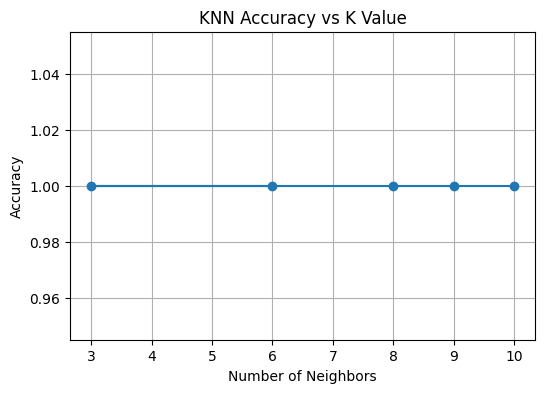

In [27]:
plt.figure(figsize=(6,4))
plt.plot(k_values,accuracies,marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [31]:
best_k = k_values[np.argmax(accuracies)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

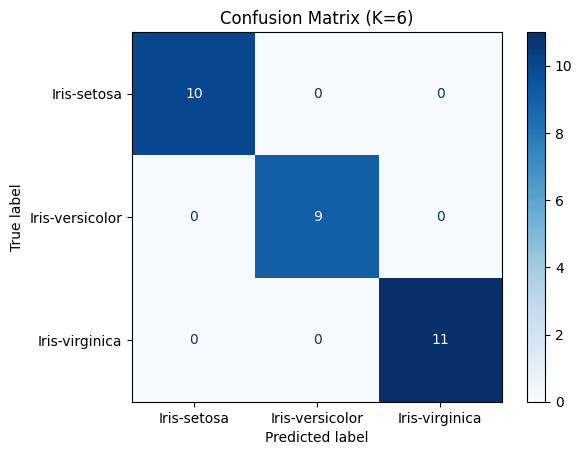

In [33]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data['Species'].unique()).plot(cmap="Blues")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

In [35]:
X_2d = x_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y, test_size=0.2, random_state=42)
model_2d = KNeighborsClassifier(n_neighbors=best_k)
model_2d.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=6)

In [36]:
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [56]:
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [57]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

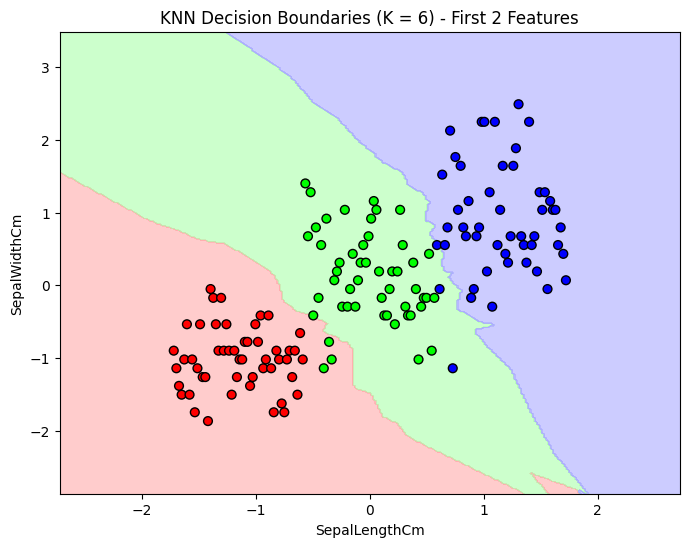

In [62]:
from matplotlib.colors import ListedColormap
y_numeric, classes = pd.factorize(y)
Z_numeric, _ = pd.factorize(Z.ravel())
Z_numeric = Z_numeric.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z_numeric, cmap=cmap_light, alpha=0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_numeric, cmap=cmap_bold, edgecolor='k', s=40)
plt.title(f"KNN Decision Boundaries (K = {best_k}) - First 2 Features")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.show()